Ejercicio 1

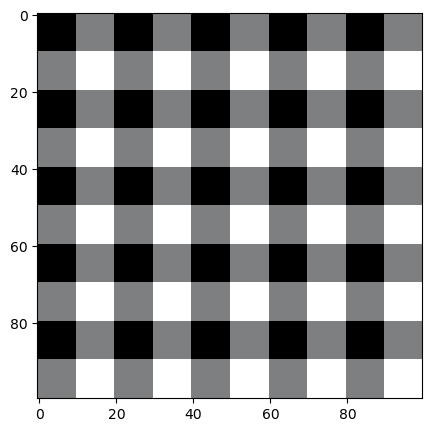

In [16]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

plt.rcParams['figure.figsize']=[10,5]

tamanio_img=100
R = np.ones((tamanio_img, tamanio_img)) * 255
G = np.ones((tamanio_img, tamanio_img)) * 255
B = np.ones((tamanio_img, tamanio_img)) * 255

imagen=np.dstack((R,G,B))
imagen=np.array(imagen,dtype=int)

for i in range(0,100,20):
    for j in range(0, 100, 20):
        for k in range(10):
            for l in range(10):
                imagen[k+i,l+j] = [1, 0, 0]
                
for i in range(0,100,20):
    for j in range(10, 100, 20):
        for k in range(10):
            for l in range(10):
                imagen[k+i,l+j] = [126, 127, 128]


for i in range(0,100,20):
    for j in range(10, 100, 20):
        for k in range(10):
            for l in range(10):
                imagen[k+j,l+i] = [126, 127, 128]

plt.figure()
plt.imshow(imagen)
plt.show()

Ejercicio 2

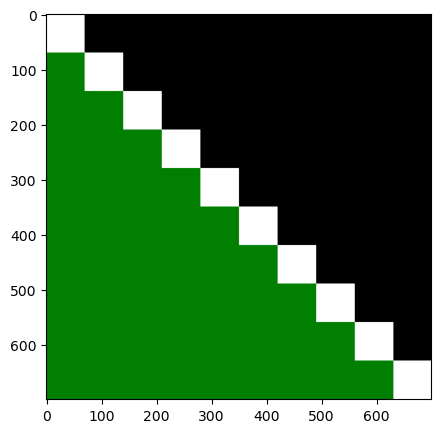

In [32]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

plt.rcParams['figure.figsize']=[10,5]

tamanio_img=700
R = np.ones((tamanio_img, tamanio_img)) * 0
G = np.ones((tamanio_img, tamanio_img)) * 0
B = np.ones((tamanio_img, tamanio_img)) * 0

imagen=np.dstack((R,G,B))
imagen=np.array(imagen,dtype=int)

for i in range(0,700,70):
    for j in range(0, 700, 70):
        for k in range(70):
            for l in range(70):
                if(j ==i):
                    imagen[k+i,l+j] = [255, 255, 255]
                elif (j+1<i+1): imagen[k+i,l+j] = [0, 127, 0]
                elif (i-j==70): imagen[k+i,l+j] = [0, 0, 254]
                


plt.figure()
plt.imshow(imagen)
plt.show()

Ejercicio 3